In [1]:
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
from pmdarima import auto_arima
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import matplotlib.pylab as plt

In [2]:
bitcoin_df = pd.read_csv('Resources/BTC-USD-monthly.csv',index_col='Date', parse_dates= True)
bitcoin_df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1191.099976,755.755981,970.403015,970.403015,5143971692
2017-02-01,970.940979,1200.390015,946.690979,1179.969971,1179.969971,4282761200
2017-03-01,1180.040039,1280.310059,903.713013,1071.790039,1071.790039,10872455960
2017-04-01,1071.709961,1347.910034,1061.089966,1347.890015,1347.890015,9757448112
2017-05-01,1348.300049,2763.709961,1348.300049,2286.409912,2286.409912,34261856864


In [3]:
bitcoin_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
bitcoin_df = bitcoin_df.drop(columns=['Open','High','Low','Adj Close','Volume'])

In [5]:
bitcoin_df.head(10)

,Close
Date,
2017-01-01,970.403015
2017-02-01,1179.969971
2017-03-01,1071.790039
2017-04-01,1347.890015
2017-05-01,2286.409912
2017-06-01,2480.840088
2017-07-01,2875.340088
2017-08-01,4703.390137
2017-09-01,4338.709961


In [6]:
bitcoin_df.dtypes

Close    float64
dtype: object

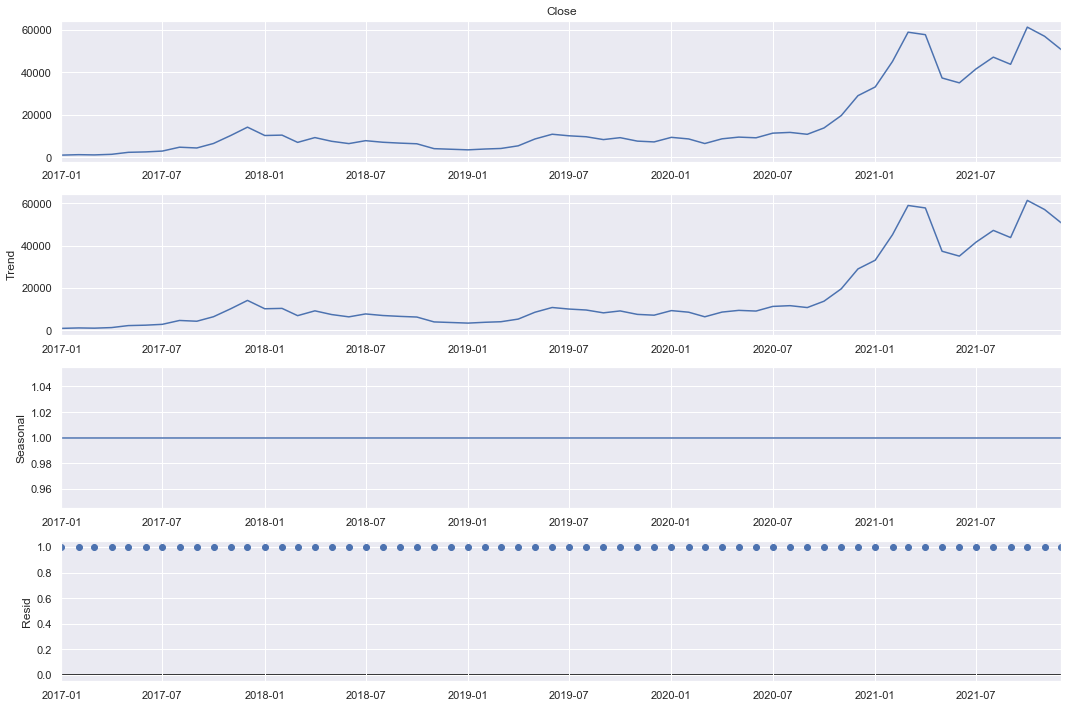

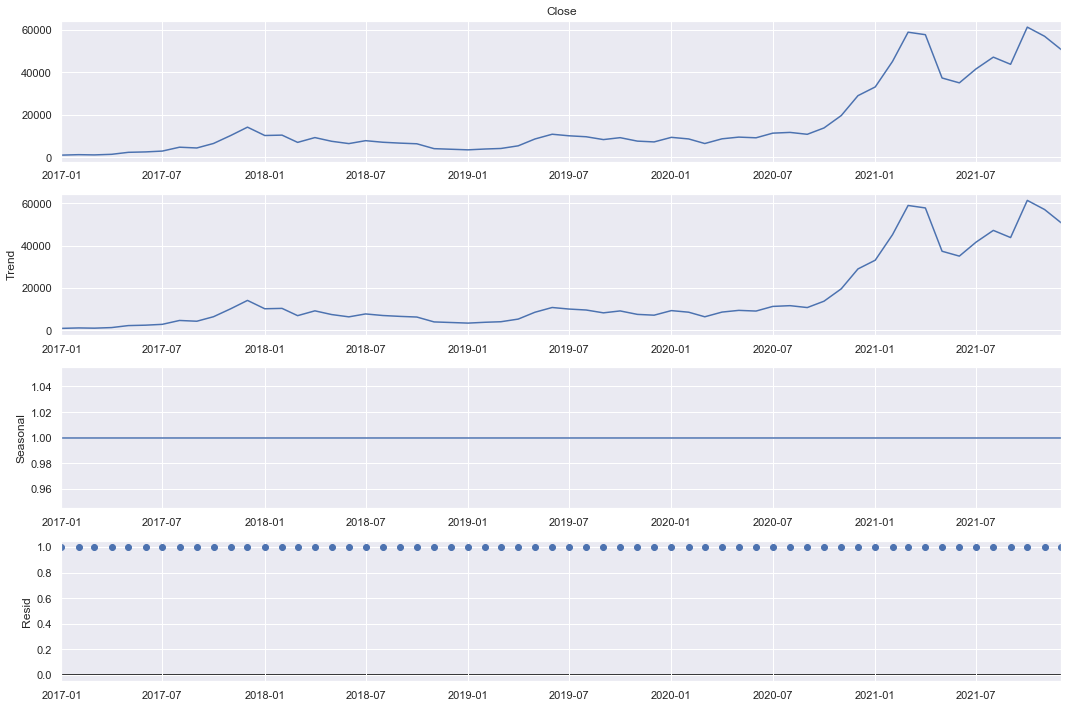

In [7]:
results = seasonal_decompose(bitcoin_df['Close'],model ='multiplicative',period=1)
plt.rcParams.update({'figure.figsize': (15,10)})
results.plot()

In [8]:
#Arima
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(bitcoin_df['Close'], start_p = 1, start_q = 1,
max_p = 3, max_q = 3, m = 12,
start_P = 0, seasonal = True,
d = None, D = 1, trace = True,
error_action ='ignore', # we don't want to know if an order does not work
suppress_warnings = True, # we don't want convergence warnings
stepwise = True)# set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=953.585, Time=0.08 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=957.482, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=952.484, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=952.002, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=955.497, Time=0.01 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=952.371, Time=0.06 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=950.655, Time=0.23 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=952.490, Time=0.37 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=953.909, Time=0.09 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=954.147, Time=0.18 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=952.093, Time=0.39 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=953.789, Time=0.10 sec
 ARIMA(1,1,2)(0,1,2)[12]             : AIC=956.011, Time=0.17 sec
 ARIMA(0,1,1)(0,1,2)[12] intercept   : AIC=952.148, Time=0.27 sec

Best model:  ARIMA(0,1,1)(0,1,2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   60
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -471.327
Date:                                 Tue, 07 Dec 2021   AIC                            950.655
Time:                                         23:25:45   BIC                            958.055
Sample:                                              0   HQIC                           953.440
                                                  - 60                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3598      0.110      3.269      0.001       0.144       0.575
ma.S.L12      -0.9058      0.400     -2.265      0.024      -1.690      -0.122
ma.S.L24       0.3896      0.515      0.756      0.450      -0.621       1.400
sigma2      2.865e+07   4.68e-08   6.12e+14      0.000    2.86e+07    2.86e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                38.64
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):              20.42   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.71e+29. Standard errors may be unstable.
"""

In [9]:
# Split data into train / test sets
train = bitcoin_df.iloc[:len(bitcoin_df)-12]
test = bitcoin_df.iloc[len(bitcoin_df)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Close'],
order = (0, 1, 1),
seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -316.081
Date:                            Tue, 07 Dec 2021   AIC                            642.162
Time:                                    23:25:45   BIC                            649.939
Sample:                                01-01-2017   HQIC                           644.846
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3487      0.234      1.490      0.136      -0.110       0.807
ar.S.L12      -1.0122      0.402     -2.520      0.012      -1.800      -0.225
ar.S.L24      -0.8167      0.336     -2.434      0.015      -1.474      -0.159
ma.S.L12      -0.1576      0.935     -0.169      0.866      -1.990       1.675
sigma2      2.598e+06   8.94e+05      2.907      0.004    8.46e+05    4.35e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 5.85
Prob(Q):                              0.67   Prob(JB):                         0.05
Heteroskedasticity (H):               2.93   Skew:                             0.84
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

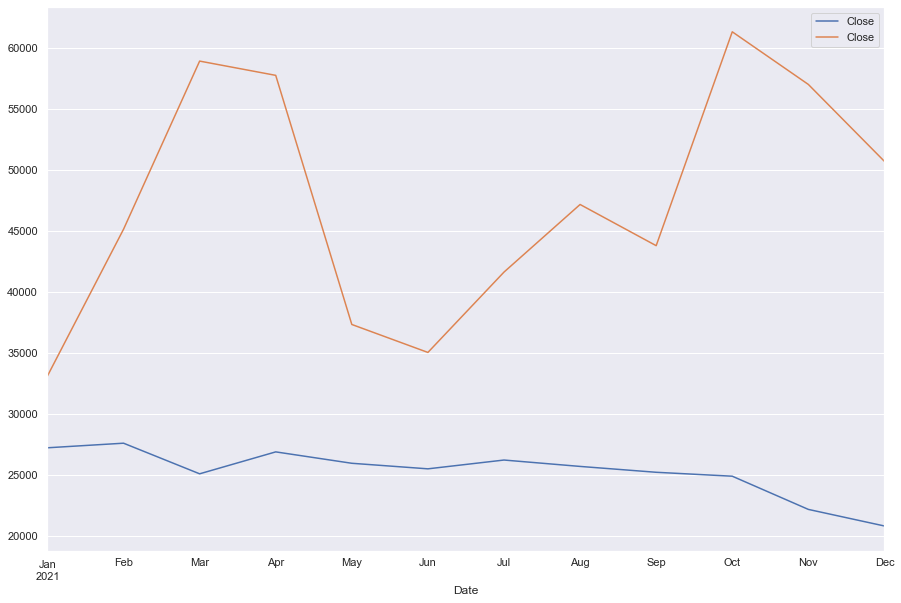

In [10]:
#Predictions of ARIMA Model agains the Test set
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,typ = 'levels').rename("Close")

# plot predictions and actual values
predictions.plot(legend = True)
test['Close'].plot(legend = True)


In [11]:
#Evaluate the model using MSE and RMSE
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Close"], predictions)

24383.832923231836

In [12]:
# Calculate mean squared error
mean_squared_error(test["Close"], predictions)

594571308.0280849

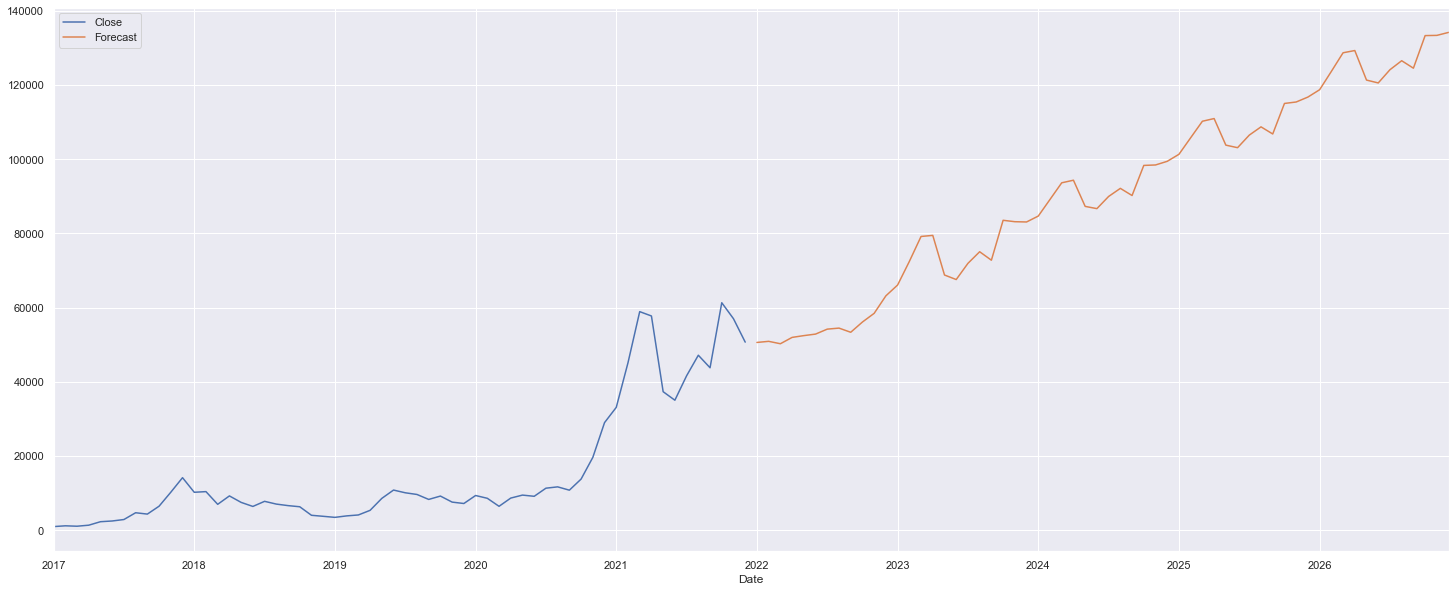

In [13]:
# Train the model on the full dataset
model = model = SARIMAX(bitcoin_df['Close'],order = (0, 1, 1),seasonal_order =(2, 1, 1, 12))
result = model.fit()

# Forecast for the next 20 years
forecast = result.predict(start = len(bitcoin_df),end = (len(bitcoin_df)-1) + 5 * 12,typ = 'levels').rename('Forecast')

# Plot the forecast values
bitcoin_df['Close'].plot(figsize = (25, 10), legend = True)
forecast.plot(legend = True)
